In [76]:
from FlowCytometryTools import FCMeasurement, ThresholdGate, PolyGate
from os.path import join
from pylab import *
import pandas as pd
import numpy as np

# Lung sample 2.1

In [77]:
# https://eyurtsev.github.io/FlowCytometryTools/API/FlowCytometryTools.FCMeasurement.html#FlowCytometryTools.FCMeasurement

In [78]:
sample_id = "lung_1_1"

In [79]:
fc_file = join("data", sample_id, "flowcore", f"{sample_id}.fcs")
sample = FCMeasurement(ID=sample_id, datafile=fc_file)

In [80]:
sample.get_data()

,GFP.KP1.9_cellMask,CD206_cellMask,BODIPY630.NP_cellMask,DAPI_1_cellMask,Arg1_cellMask,CD11c_cellMask,CD45_cellMask,DAPI_2_cellMask,C12.D.nanoparticle_cellMask,X7C1.F5.nanoparticle_cellMask,...,Y_centroid,column_centroid,row_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,0.0,0.0,0.000000,7918.143066,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,2.428571,409.714294,2.428571,7.0,4.155375,1.905471,0.888666,1.000000,0.875000,1.425068
1,0.0,0.0,0.000000,7638.666504,107.083336,0.000000,556.833313,0.000000,0.0,0.0,...,3.416667,442.583344,3.416667,24.0,7.013621,4.610158,0.753616,0.960000,0.685714,-1.353204
2,0.0,0.0,0.000000,8372.913086,0.000000,0.000000,4514.217285,0.000000,0.0,0.0,...,2.913043,452.347839,2.913043,23.0,9.499780,3.043466,0.947292,0.958333,0.766667,1.504496
3,0.0,0.0,0.000000,7684.592773,0.000000,0.000000,133.259262,0.000000,0.0,0.0,...,4.666667,477.666656,4.666667,27.0,7.238298,4.843439,0.743136,0.931035,0.642857,-0.480035
4,0.0,0.0,0.000000,6230.272949,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,4.136364,491.227264,4.136364,22.0,6.077495,4.645046,0.644858,0.956522,0.733333,1.360154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0.0,0.0,149.875000,7742.250000,0.000000,0.000000,0.000000,4412.000000,0.0,0.0,...,512.000000,112.250000,512.000000,8.0,4.100618,2.486951,0.795097,0.888889,0.666667,1.144813
2145,0.0,0.0,7.772727,10408.590820,0.000000,81.772728,0.000000,6942.909180,0.0,0.0,...,514.681824,58.545456,514.681824,22.0,6.861323,4.306052,0.778549,0.880000,0.733333,0.323257
2146,0.0,0.0,228.333328,8024.000000,0.000000,0.000000,0.000000,5996.666504,0.0,0.0,...,512.666687,105.666664,512.666687,3.0,2.309401,1.333333,0.816497,1.000000,0.750000,0.785398
2147,0.0,0.0,31.090910,7780.000000,0.000000,0.000000,0.000000,7608.818359,0.0,0.0,...,513.909119,120.363640,513.909119,11.0,4.346130,3.067356,0.708444,1.000000,0.916667,-1.307763


In [81]:
print(sample.channel_names)

('GFP.KP1.9_cellMask', 'CD206_cellMask', 'BODIPY630.NP_cellMask', 'DAPI_1_cellMask', 'Arg1_cellMask', 'CD11c_cellMask', 'CD45_cellMask', 'DAPI_2_cellMask', 'C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask', 'G0.P5.nanoparticle_cellMask', 'X_centroid', 'Y_centroid', 'column_centroid', 'row_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation')


In [82]:
tsample = sample.transform('hlog', channels=['DAPI_1_cellMask'], b=500.0)

In [83]:
gfp_pos_gate = PolyGate([(2500, 3000), (20000, 3000), (20000, 30000), (2500, 30000)], channels=['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], region='in', name='GFP+ Tumor')
gfp_neg_gate = PolyGate([(2500, 0), (20000, 0), (20000, 2000), (2500, 2000)], channels=['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], region='in', name='GFP- Host')

# Host (slide 1)
gfp_neg_cd45_pos_cd206_pos_gate = PolyGate([(500, 500), (15000, 500), (15000, 10000), (500, 10000)], channels=['CD45_cellMask', 'CD206_cellMask'], region='in', name='CD45+CD206+')
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate = PolyGate([(3000, 1000), (10000, 1000), (10000, 4000), (3000, 4000)], channels=['Arg1_cellMask', 'CD11c_cellMask'], region='in', name='CD11c+Arg1+')

# Tumor (slide 2)
gfp_pos_cd45_neg_cd206_neg_gate = PolyGate([(0, 0), (7000, 0), (7000, 13750), (0, 13750)], channels=['CD45_cellMask', 'CD206_cellMask'], region='in', name='CD45-CD206-')
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate = PolyGate([(2500, 0), (12500, 0), (12500, 9000), (2500, 9000)], channels=['Arg1_cellMask', 'CD11c_cellMask'], region='in', name='CD11c-Arg1-')

In [84]:
figure();

<Figure size 432x288 with 0 Axes>

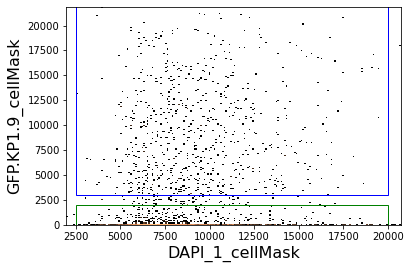

In [85]:
sample.plot(['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], gates=[gfp_pos_gate, gfp_neg_gate]);

In [86]:
gfp_pos_gated_sample = sample.gate(gfp_pos_gate)
gfp_neg_gated_sample = sample.gate(gfp_neg_gate)

In [87]:
gfp_neg_gated_sample.counts

484

## GFP- Host

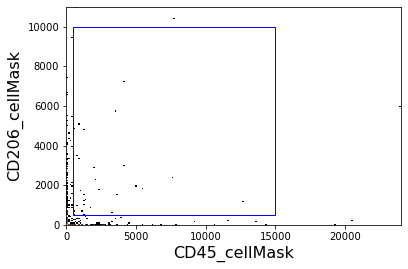

In [88]:
gfp_neg_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_gate]);

In [89]:
gfp_neg_cd45_pos_cd206_pos_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_gate)

In [90]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.counts

27

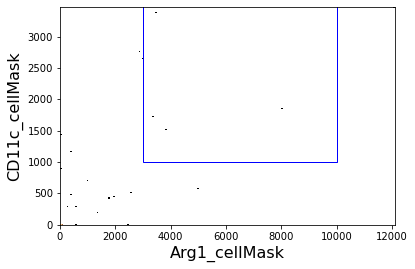

In [91]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate]);

In [92]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample = gfp_neg_cd45_pos_cd206_pos_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate)

In [93]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.counts

4

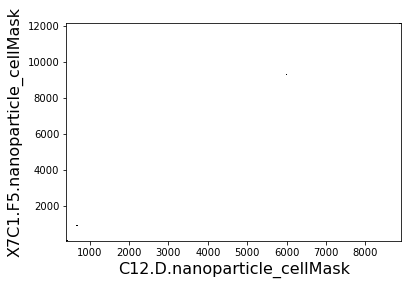

In [94]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.plot(['C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask']);

## GFP+ Tumor

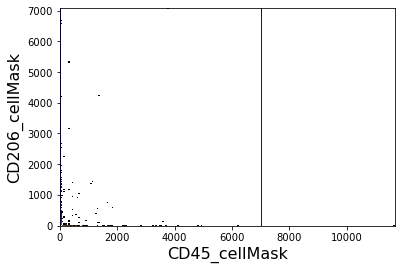

In [95]:
gfp_pos_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_gate]);

In [96]:
gfp_pos_cd45_neg_cd206_neg_gated_sample = gfp_pos_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_gate)

In [97]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.counts

186

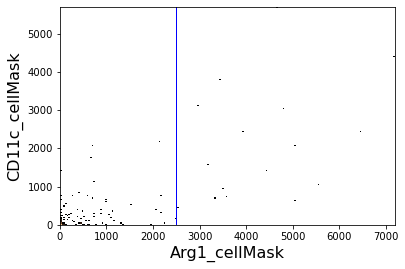

In [98]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate]);

In [99]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample = gfp_pos_cd45_neg_cd206_neg_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate)

In [100]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample.counts

17

In [101]:
def classify_cells(sample, class_to_df):
    df = pd.DataFrame(index=sample.get_data().index.values.tolist(), columns=[], data=[])
    for cell_class_name, cell_class_sample in class_to_df.items():
        cells = cell_class_sample.get_data().index.values.tolist()
        df[cell_class_name] = df.index.to_series().apply(lambda i: i in cells)
    
    return df

In [102]:
df = classify_cells(sample, {
    "GFP-": gfp_neg_gated_sample,
    "GFP-/CD45+CD206+": gfp_neg_cd45_pos_cd206_pos_gated_sample,
    "GFP-/CD45+CD206+/CD11c+Arg1+": gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample,
    "GFP+": gfp_pos_gated_sample,
    "GFP+/CD45-CD206-": gfp_pos_cd45_neg_cd206_neg_gated_sample,
    "GFP+/CD45-CD206-/CD11c-Arg1-": gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample,
})

df.to_csv(join("data", sample_id, "flowcore", f"{sample_id}.classes.csv"), index=True)

In [103]:
writer = pd.ExcelWriter(join("data", sample_id, "flowcore", f"{sample_id}.classes.xlsx"))

for col in df.columns.values.tolist():
    sample.get_data().loc[df[col]].to_excel(writer, sheet_name=col.replace("/", " "))

writer.save()